In [1]:
# 필요한 라이브러리 호출
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# power_mean_mon을 csv 형식으로 변환, cp949로 인코딩
power_mean_mon = pd.read_csv('power_mean_mon.csv',encoding='cp949')
weather_mean_mon = pd.read_csv('weather_mean_mon.csv',encoding='cp949')

In [3]:
# power_mean_mon 데이터의 상위 2개의 행 출력
power_mean_mon.head(2)

,year,month,현재수요(MW)
0,2012,6,55649.90712
1,2012,7,58375.80796


In [4]:
# weather_mean_mon 데이터의 상위 2개의 행 출력
weather_mean_mon.head(2)

,year,month,기온(°C),풍속(m/s),습도(%)
0,2012,6,21.821471,2.039055,71.769715
1,2012,7,25.225634,1.957829,80.756319


c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


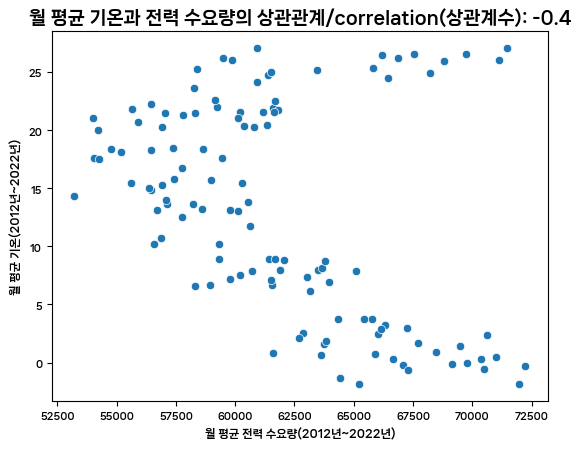

In [5]:
# 현재 전력 수요량과 기온의 상관계수 계산
correlation = power_mean_mon['현재수요(MW)'].corr(weather_mean_mon['기온(°C)'])
# scatter plot으로 시각화
sns.scatterplot(power_mean_mon['현재수요(MW)'], weather_mean_mon['기온(°C)'])
# x축 레이블 지정
plt.xlabel('월 평균 전력 수요량(2012년~2022년)', fontsize=8)
# y축 레이블 지정
plt.ylabel('월 평균 기온(2012년~2022년)', fontsize=8)
# 차트 제목 지정
plt.title('월 평균 기온과 전력 수요량의 상관관계/correlation(상관계수): '+str(np.round(correlation,2)),fontsize=13)
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


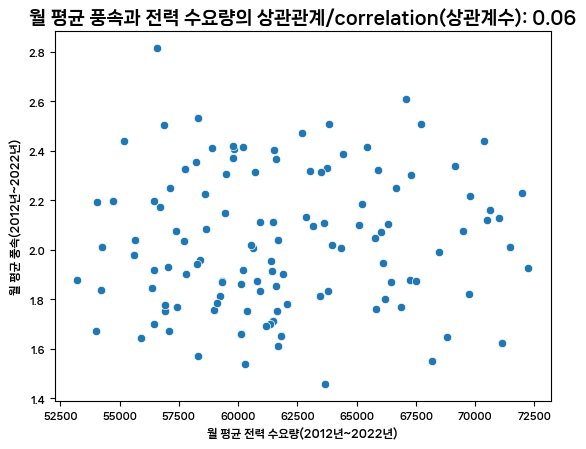

In [6]:
# 현재 전력 수요량과 풍속의 상관계수 계산
correlation = power_mean_mon['현재수요(MW)'].corr(weather_mean_mon['풍속(m/s)'])
# scatter plot으로 시각화
sns.scatterplot(power_mean_mon['현재수요(MW)'], weather_mean_mon['풍속(m/s)'])
# x축 레이블 지정
plt.xlabel('월 평균 전력 수요량(2012년~2022년)', fontsize=8)
# y축 레이블 지정
plt.ylabel('월 평균 풍속(2012년~2022년)', fontsize=8)
# 차트 제목 지정
plt.title('월 평균 풍속과 전력 수요량의 상관관계/correlation(상관계수): '+str(np.round(correlation,2)),fontsize=13)
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


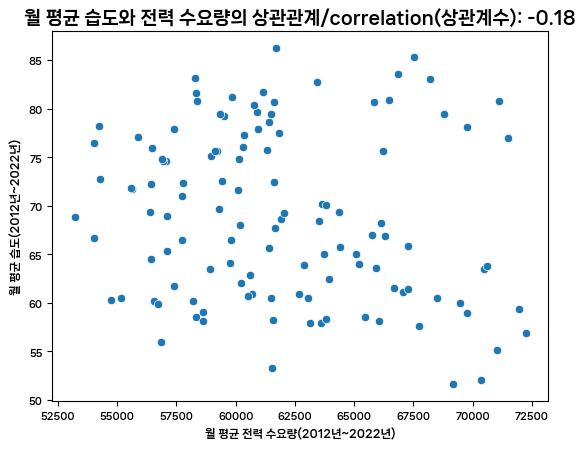

In [7]:
# 현재 전력 수요량과 습도의 상관계수 계산
correlation = power_mean_mon['현재수요(MW)'].corr(weather_mean_mon['습도(%)'])
# scatter plot으로 시각화
sns.scatterplot(power_mean_mon['현재수요(MW)'], weather_mean_mon['습도(%)'])
# x축 레이블 지정
plt.xlabel('월 평균 전력 수요량(2012년~2022년)', fontsize=8)
# y축 레이블 지정
plt.ylabel('월 평균 습도(2012년~2022년)', fontsize=8)
# 차트 제목 지정
plt.title('월 평균 습도와 전력 수요량의 상관관계/correlation(상관계수): '+str(np.round(correlation,2)),fontsize=13)
plt.show()

In [9]:
# blackout csv 파일 불러옴
blackout = pd.read_csv('blackout.csv',encoding='cp949')

In [13]:
# blackout 데이터의 상위 2개의 행 출력
blackout.head(2)

,Unnamed: 0,정전피해_지역,피해_가구수,시작시간,종료시간
0,0,강원도 삼척시,1,2022.03.05 00:30,2022.03.05 01:23
1,1,강원도 삼척시,14,2022.03.04 17:43,2022.03.05 01:21


In [24]:
# to_datetime으로 date 형식의 자료형을 datetime형으로 변경
blackout = pd.read_csv('blackout.csv',parse_dates=["시작시간"],encoding='cp949')
pd.to_datetime(blackout['시작시간'])
blackout['year'] = blackout['시작시간'].dt.year
blackout['month'] = blackout['시작시간'].dt.month
blackout['day'] = blackout['시작시간'].dt.day

In [25]:
# blackout 데이터의 상위 2개의 행 출력
blackout.head(2)

,Unnamed: 0,정전피해_지역,피해_가구수,시작시간,종료시간,year,month,day
0,0,강원도 삼척시,1,2022-03-05 00:30:00,2022.03.05 01:23,2022,3,5
1,1,강원도 삼척시,14,2022-03-04 17:43:00,2022.03.05 01:21,2022,3,4


In [26]:
blackout.columns

Index(['Unnamed: 0', '정전피해_지역', '피해_가구수', '시작시간', '종료시간', 'year', 'month',
       'day'],
      dtype='object')

In [27]:
blackout = blackout[['year','month','정전피해_지역', '피해_가구수', '시작시간', '종료시간' ]]

In [133]:
power_mean_mon

,year,month,현재수요(MW)
0,2012,6,55649.90712
1,2012,7,58375.80796
2,2012,8,59491.12602
3,2012,9,54226.44174
4,2012,10,53218.53066
...,...,...,...
114,2021,12,70616.98313
115,2022,1,72234.12827
116,2022,2,70367.03873
117,2022,3,65095.50478


In [28]:
blackout

,year,month,정전피해_지역,피해_가구수,시작시간,종료시간
0,2022,3,강원도 삼척시,1,2022-03-05 00:30:00,2022.03.05 01:23
1,2022,3,강원도 삼척시,14,2022-03-04 17:43:00,2022.03.05 01:21
2,2022,3,강원도 삼척시,10,2022-03-04 17:43:00,2022.03.04 18:27
3,2022,2,인천광역시 강화군,2000,2022-02-08 16:26:00,2022.02.08 11:31
4,2022,2,인천광역시 부평구,2000,2022-02-04 16:30:00,2022.02.04 18:45
...,...,...,...,...,...,...
4111,2012,6,강원도 속초시,1300,2012-06-28 14:40:00,2012.06.28 14:58
4112,2012,6,강원도 고성군,1200,2012-06-28 14:30:00,2012.06.28 14:59
4113,2012,6,경기도 파주시,376,2012-06-14 11:20:00,2012.06.14 11:50
4114,2012,6,경기도 파주시,2692,2012-06-14 11:20:00,2012.06.14 11:50


c:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


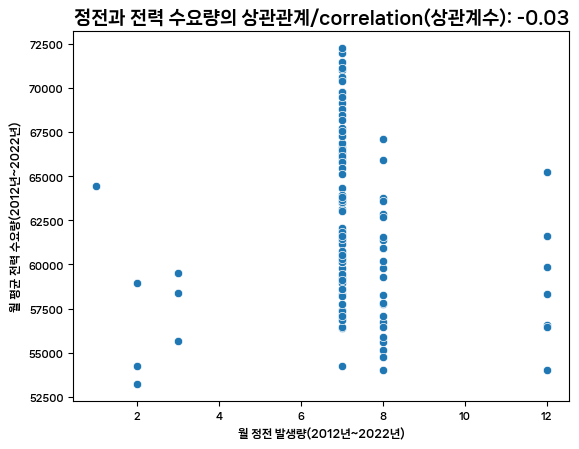

In [29]:
# 현재 전력 수요량과 정전의 상관계수 계산
correlation = blackout['month'].corr(power_mean_mon['현재수요(MW)'])
# scatter plot으로 시각화
sns.scatterplot(blackout['month'], power_mean_mon['현재수요(MW)'])
# y축 레이블 지정
plt.ylabel('월 평균 전력 수요량(2012년~2022년)', fontsize=8)
# x축 레이블 지정
plt.xlabel('월 정전 발생량(2012년~2022년)', fontsize=8)
# 차트 제목 지정
plt.title('정전과 전력 수요량의 상관관계/correlation(상관계수): '+str(np.round(correlation,2)),fontsize=13)
plt.show()

In [30]:
# balckout_mean_day_data csv 파일 불러옴
blackout_mean_day = pd.read_csv('balckout_mean_day_data.csv',encoding='cp949')

In [31]:
# blackout_mean_day 데이터의 상위 2개의 행 출력
blackout_mean_day.head(2)

,Unnamed: 0,year,month,day,피해_가구수
0,0,2012,6,14,1785.333333
1,1,2012,6,28,1250.000000


In [32]:
# power_demand_mean_day_data csv 파일 불러옴
power_demand_mean_day = pd.read_csv('power_demand_mean_day_data.csv',encoding='cp949')

In [33]:
# power_demand_mean_day 데이터의 상위 2개의 행 출력
power_demand_mean_day.head(2)

,Unnamed: 0,year,month,day,현재수요(MW),공급능력(MW),공급예비율(퍼센트)
0,0,2012,6,1,55679.166566,64806.073548,16.949694
1,1,2012,6,2,52084.537814,62603.895833,20.548948


In [34]:
# year과 month로 묶어서 피해_가구수의 합 게산
blackout_sum = blackout_mean_day.groupby(['year','month'],as_index=False)['피해_가구수'].sum()

In [35]:
blackout_sum

,year,month,피해_가구수
0,2012,6,3160.666667
1,2012,7,4160.186147
2,2012,8,11390.724809
3,2012,9,7717.398907
4,2012,12,3000.000000
5,2013,3,17.000000
6,2013,6,4692.000000
7,2013,7,8203.428571
8,2013,8,16203.461538
9,2013,10,2161.642857


In [36]:
# power_demand_mean_day 데이터의 상위 2개의 행 출력
power_demand_mean_day.head(2)

,Unnamed: 0,year,month,day,현재수요(MW),공급능력(MW),공급예비율(퍼센트)
0,0,2012,6,1,55679.166566,64806.073548,16.949694
1,1,2012,6,2,52084.537814,62603.895833,20.548948


In [37]:
# year과 month로 묶어서 현재수요 합 게산
power_mean_day = power_demand_mean_day.groupby(['year','month'],as_index=False)['현재수요(MW)'].sum()

In [38]:
power_mean_day

,year,month,현재수요(MW)
0,2012,6,1.669497e+06
1,2012,7,1.809650e+06
2,2012,8,1.844225e+06
3,2012,9,1.626793e+06
4,2012,10,1.649774e+06
...,...,...,...
114,2021,12,2.189126e+06
115,2022,1,2.238556e+06
116,2022,2,1.970277e+06
117,2022,3,2.017961e+06


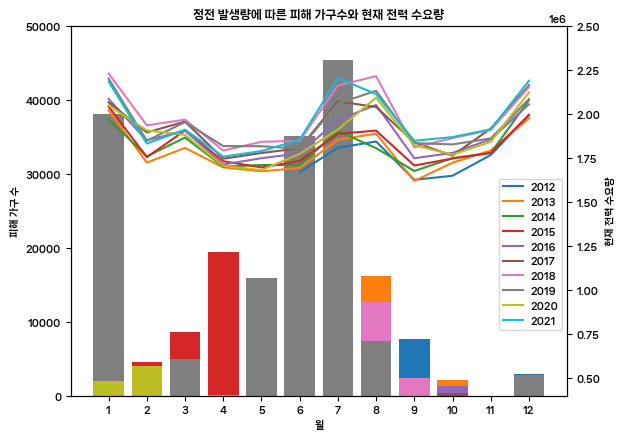

In [43]:
# 하나의 ax 만을 가지는 하나의 figure 생성
fig, ax1 = plt.subplots()
# ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2 = ax1.twinx()


# blackout_sum의 year 컬럼 중 고유값을 for문을 통해 반복해서 출력
for i, year in enumerate(blackout_sum['year'].unique()):
    year_data = blackout_sum[blackout_sum['year'] == year]
    ax1.bar(year_data['month'], year_data['피해_가구수'], label=str(year))
plt.title('정전 발생량에 따른 피해 가구수와 현재 전력 수요량')
ax1.set_xlabel('월')
ax1.set_ylabel('피해 가구 수')
ax1.set_ylim([0, 50000])


# power_mean_day의 year 컬럼 중 고유값을 for문을 통해 반복해서 출력
# 2022년 데이터는 6월까지만 있어 중지
for i, year in enumerate(power_mean_day['year'].unique()):
    if year==2022:
        break
    year_data = power_mean_day[power_mean_day['year'] == year]
    ax2.plot(year_data['month'], year_data['현재수요(MW)'], label=str(year))
ax2.set_ylabel('현재 전력 수요량')
ax2.set_ylim([400000, 2500000])


months = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
plt.xticks(np.arange(1, 13), months)

# 범례
plt.legend(bbox_to_anchor=(1, 0.6))

plt.show()